# Cleaning U.S. Census Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

First must extract multiple census files and join.

In [2]:
census_files = glob.glob('states*.csv')

In [3]:
# loop through census files and load them into a dataframe
df_list = []
for file in census_files:
    data = pd.read_csv(file)
    df_list.append(data)
    
us_census = pd.concat(df_list)

Inspect the data

In [4]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [5]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  60 non-null     int64 
 1   State       60 non-null     object
 2   TotalPop    60 non-null     int64 
 3   Hispanic    60 non-null     object
 4   White       60 non-null     object
 5   Black       60 non-null     object
 6   Native      60 non-null     object
 7   Asian       60 non-null     object
 8   Pacific     55 non-null     object
 9   Income      60 non-null     object
 10  GenderPop   60 non-null     object
dtypes: int64(2), object(9)
memory usage: 5.6+ KB


In [6]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


must convert `Income` column into format that is ready for conversion into numerical type

In [7]:
us_census.Income = us_census.Income.replace('[\$,]', '', regex=True)
us_census.Income = pd.to_numeric(us_census.Income)

In [8]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F


The gender population column, `GenderPop`, must be split into two columns, the `Men` and `Women`.

In [9]:
us_census['gender_split'] = us_census.GenderPop.str.split('_')

In [10]:
us_census.gender_split.head()

0      [2341093M, 2489527F]
1        [384160M, 349215F]
2      [3299088M, 3342840F]
3      [1451913M, 1506295F]
4    [19087135M, 19334329F]
Name: gender_split, dtype: object

In [11]:
us_census.gender_split.str[0].head()

0     2341093M
1      384160M
2     3299088M
3     1451913M
4    19087135M
Name: gender_split, dtype: object

In [12]:
us_census['Men'] = us_census.gender_split.str[0]
us_census['Women'] = us_census.gender_split.str[1]

Clean up data from new columns

In [13]:
us_census.Men = us_census.Men.replace('[M]', '', regex=True)
us_census.Women = us_census.Women.replace('[F]', '', regex=True)

Convert both columns to numerical datatypes

In [14]:
us_census.Men = pd.to_numeric(us_census.Men)
us_census.Women = pd.to_numeric(us_census.Women)

In [15]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,gender_split,Men,Women
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,"[2341093M, 2489527F]",2341093,2489527.0
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,"[384160M, 349215F]",384160,349215.0
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,"[3299088M, 3342840F]",3299088,3342840.0
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,"[1451913M, 1506295F]",1451913,1506295.0
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,"[19087135M, 19334329F]",19087135,19334329.0


In [16]:
us_census.Men.dtype

dtype('int64')

Data now ready for plotting

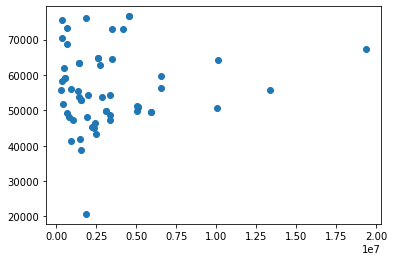

In [17]:
plt.scatter(us_census.Women, us_census.Income)
plt.show()

Check for  missing data

In [18]:
missing_data = us_census.isnull()
missing_data.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,gender_split,Men,Women
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Unnamed: 0
False    60
Name: Unnamed: 0, dtype: int64

State
False    60
Name: State, dtype: int64

TotalPop
False    60
Name: TotalPop, dtype: int64

Hispanic
False    60
Name: Hispanic, dtype: int64

White
False    60
Name: White, dtype: int64

Black
False    60
Name: Black, dtype: int64

Native
False    60
Name: Native, dtype: int64

Asian
False    60
Name: Asian, dtype: int64

Pacific
False    55
True      5
Name: Pacific, dtype: int64

Income
False    60
Name: Income, dtype: int64

GenderPop
False    60
Name: GenderPop, dtype: int64

gender_split
False    60
Name: gender_split, dtype: int64

Men
False    60
Name: Men, dtype: int64

Women
False    57
True      3
Name: Women, dtype: int64



`Women` column has 3 missing values. Replace missing values with `TotalPop` minus `Men` for state.

In [20]:
us_census.Women = us_census.Women.fillna(us_census.TotalPop - us_census.Men)

In [21]:
us_census.Women.isnull().value_counts()

False    60
Name: Women, dtype: int64

In [22]:
us_census = us_census.drop_duplicates(subset=['State'])

Redraw scatter plot with clean data

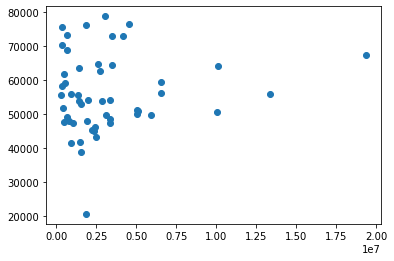

In [23]:
plt.scatter(us_census.Women, us_census.Income)
plt.show()

In [24]:
print(us_census.columns)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'gender_split',
       'Men', 'Women'],
      dtype='object')


Remove '%' from race columns

In [25]:
us_census.columns[3:9]

Index(['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'], dtype='object')

In [26]:
for column in us_census.columns[3:9]:
    us_census[column] = us_census[column].replace('[\%]', '', regex=True)
        

In [27]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,gender_split,Men,Women
0,0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093M_2489527F,"[2341093M, 2489527F]",2341093,2489527.0
1,1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160M_349215F,"[384160M, 349215F]",384160,349215.0
2,2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088M_3342840F,"[3299088M, 3342840F]",3299088,3342840.0
3,3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913M_1506295F,"[1451913M, 1506295F]",1451913,1506295.0
4,4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135M_19334329F,"[19087135M, 19334329F]",19087135,19334329.0


Must convert race columns to integer form for plotting

In [28]:
for column in us_census.columns[3:9]:
    us_census[column] = pd.to_numeric(us_census[column])

In [29]:
us_census.dtypes

Unnamed: 0        int64
State            object
TotalPop          int64
Hispanic        float64
White           float64
Black           float64
Native          float64
Asian           float64
Pacific         float64
Income          float64
GenderPop        object
gender_split     object
Men               int64
Women           float64
dtype: object

Replace NaN values in race columns with average of column.

In [30]:
us_census = us_census.fillna(value={'Hispanic':us_census.Hispanic.mean(), 'White':us_census.White.mean(), 
                        'Black':us_census.Black.mean(), 'Native':us_census.Native.mean(), 
                                    'Asian':us_census.Asian.mean(), 'Pacific':us_census.Pacific.mean()})

In [31]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,gender_split,Men,Women
0,0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093M_2489527F,"[2341093M, 2489527F]",2341093,2489527.0
1,1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160M_349215F,"[384160M, 349215F]",384160,349215.0
2,2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088M_3342840F,"[3299088M, 3342840F]",3299088,3342840.0
3,3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913M_1506295F,"[1451913M, 1506295F]",1451913,1506295.0
4,4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135M_19334329F,"[19087135M, 19334329F]",19087135,19334329.0


In [32]:
us_census.Pacific.isnull().value_counts()

False    51
Name: Pacific, dtype: int64

In [33]:
us_census.describe()

,Unnamed: 0,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
count,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01
mean,2.941176,6.265067e+06,12.648039,67.261176,11.945098,1.547843,3.645098,0.307021,55922.667255,3.081423e+06,3.183644e+06
std,1.475287,7.017552e+06,15.697733,18.394281,11.854634,3.105255,5.293489,1.226422,11479.923759,3.464446e+06,3.553646e+06
min,0.000000,6.266040e+05,1.290000,0.770000,0.090000,0.000000,0.080000,0.000000,20720.540000,3.066740e+05,3.180310e+05
25%,2.000000,1.860392e+06,4.675000,56.805000,3.055000,0.195000,1.245000,0.030000,48358.540000,9.216185e+05,9.387740e+05
50%,3.000000,4.397353e+06,8.460000,71.140000,8.200000,0.360000,2.320000,0.050000,54207.820000,2.164208e+06,2.233145e+06
75%,4.000000,6.845525e+06,13.415000,79.635000,17.370000,1.035000,3.845000,0.140000,63889.835000,3.393406e+06,3.476838e+06
max,5.000000,3.842146e+07,98.890000,93.980000,51.780000,16.390000,36.590000,8.760000,78765.400000,1.908714e+07,1.933433e+07


Data is now ready for plotting!

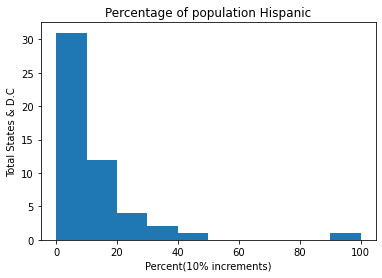

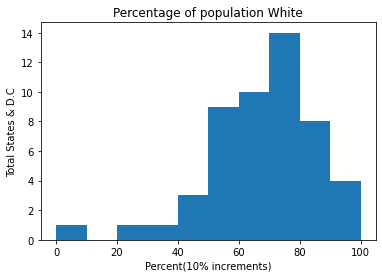

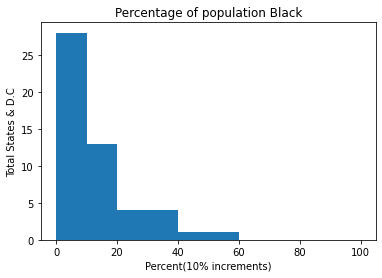

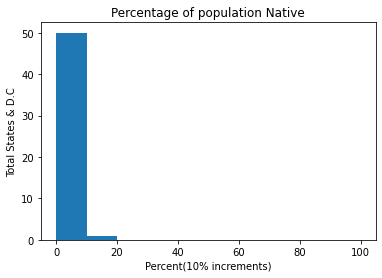

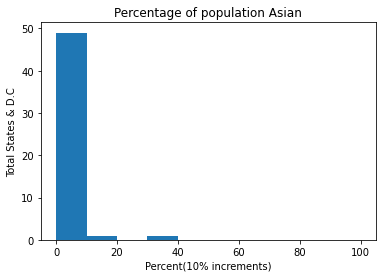

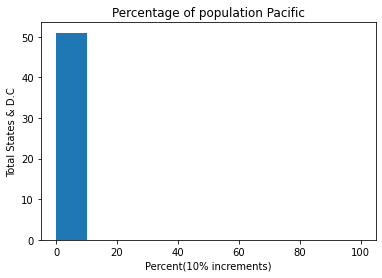

In [34]:
for column in us_census.columns[3:9]:
    plt.hist(us_census[column], range=(0, 100), bins=10)
    plt.title('Percentage of population '+ column)
    plt.xlabel('Percent(10% increments)')
    plt.ylabel('Total States & D.C')
    plt.show()
    print("")

Drop column `Unnamed`

In [35]:
us_census.drop('Unnamed: 0', axis = 1, inplace=True)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,gender_split,Men,Women
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093M_2489527F,"[2341093M, 2489527F]",2341093,2489527.0
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160M_349215F,"[384160M, 349215F]",384160,349215.0
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088M_3342840F,"[3299088M, 3342840F]",3299088,3342840.0
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913M_1506295F,"[1451913M, 1506295F]",1451913,1506295.0
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135M_19334329F,"[19087135M, 19334329F]",19087135,19334329.0


Data has been wrangled and cleaned. Ready for export.

In [36]:
us_census.to_csv('clean_us_census.csv')